In [1]:
import Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `~/Desktop/SLR-to-BI-4750`


In [2]:
using Random # random number generation
using Distributions # probability distributions and interface
using Statistics # basic statistical functions, including mean
using Plots # plotting
using DataFrames
# using Measures
# using MarkdownTables
using XLSX
using CSV
using Dates
using StatsModels
using GLM
using KernelDensity

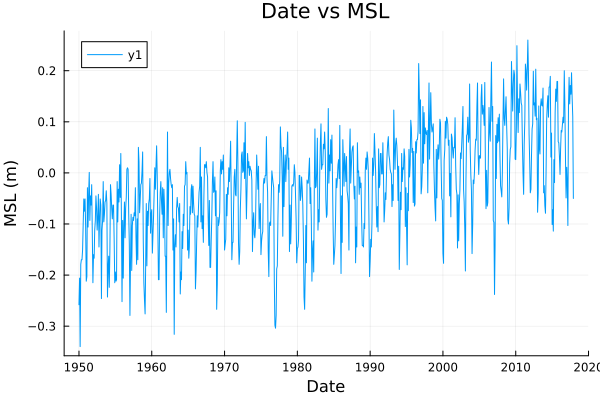

In [3]:
history = CSV.read("data/CO-OPS_8518750_met.csv", DataFrame)

history.Date = Date.(history.Date, "yyyy/mm/dd")  
rename!(history, Symbol("MSL (m)") => :MSL)
plot(history.Date, history."MSL", xlabel="Date", ylabel="MSL (m)", title="Date vs MSL", 
    xticks=(collect(Date(1950, 1, 1):Year(10):Date(2020, 1, 1)), string.(1950:10:2020)))

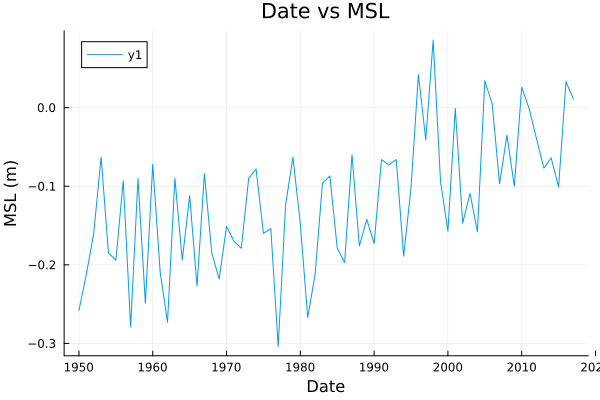

In [6]:
history_simple = select(history, :Date, :("MSL"))
decades_df = filter(row -> month(row.Date) == 1 && day(row.Date) == 1, history_simple)
plot(decades_df.Date, decades_df."MSL", xlabel="Date", ylabel="MSL (m)", title="Date vs MSL", 
    xticks=(collect(Date(1950, 1, 1):Year(10):Date(2020, 1, 1)), string.(1950:10:2020)))

In [8]:
function nmc(distribution, data, year)
    samples = rand(distribution, 1000)
    new_date = Date("$year-01-01")  
    new_row = (Date = new_date, MSL = mean(samples))
    
    data = push!(data, new_row)
    return data

end

nmc (generic function with 1 method)

In [9]:
decades_df_good = filter(row -> month(row.Date) == 1 && day(row.Date) == 1, history_simple)
decades_df_med = filter(row -> month(row.Date) == 1 && day(row.Date) == 1, history_simple)
decades_df_bad = filter(row -> month(row.Date) == 1 && day(row.Date) == 1, history_simple)
decades_df_eq = filter(row -> month(row.Date) == 1 && day(row.Date) == 1, history_simple);

In [ ]:
msl_2030 = nmc(mixture_model_2030_good, decades_df, 2030)
msl_2040 = nmc(mixture_model_2040_good, decades_df, 2040)
msl_2050 = nmc(mixture_model_2050_good, decades_df, 2050)
msl_2060 = nmc(mixture_model_2060_good, decades_df, 2060)
msl_2070 = nmc(mixture_model_2070_good, decades_df, 2070)
msl_2080 = nmc(mixture_model_2080_good, decades_df, 2080)
msl_2090 = nmc(mixture_model_2090_good, decades_df, 2090)
msl_2100 = nmc(mixture_model_2100_good, decades_df, 2100)